In [1]:
from utils import *
from plots import *
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
PVALUE = 0.05
DATA_PATH = "../data/llm_dark_patterns.xls"
MODEL_NAME = "Claude_3_Haiku"
BASELINE_PATH = "../data/baseline.xlsx"

### 1. Load data

In [3]:
df = pd.read_excel(DATA_PATH, decimal=",", sheet_name=MODEL_NAME)
baseline_df = pd.read_excel(BASELINE_PATH)

In [4]:
text_feature_cols = list(df.columns[24:])
baseline_feature_cols = list(baseline_df.columns[8:])

In [5]:
len(text_feature_cols)

86

In [6]:
len(baseline_feature_cols)

84

In [7]:
text_feature_cols = list(set(text_feature_cols).intersection(set(baseline_feature_cols)))
len(text_feature_cols)

80

In [8]:
female_df, male_df = prepare_dfs(df, text_feature_cols)
baseline_df = baseline_df[text_feature_cols].astype("float")

### 2. Perform Wilcoxon test

In [9]:
wilcoxon_pvalues = compute_wilcoxon_pvalues(female_df, male_df, text_feature_cols, MODEL_NAME)

# categorize
wilcoxon_pvalues_0_05 = {
    feature: pvalue for feature, pvalue in wilcoxon_pvalues.items() if pvalue < PVALUE
}
wilcoxon_pvalues_0_95 = {
    feature: pvalue for feature, pvalue in wilcoxon_pvalues.items() if pvalue >= PVALUE
}

### 3. Distribution plots

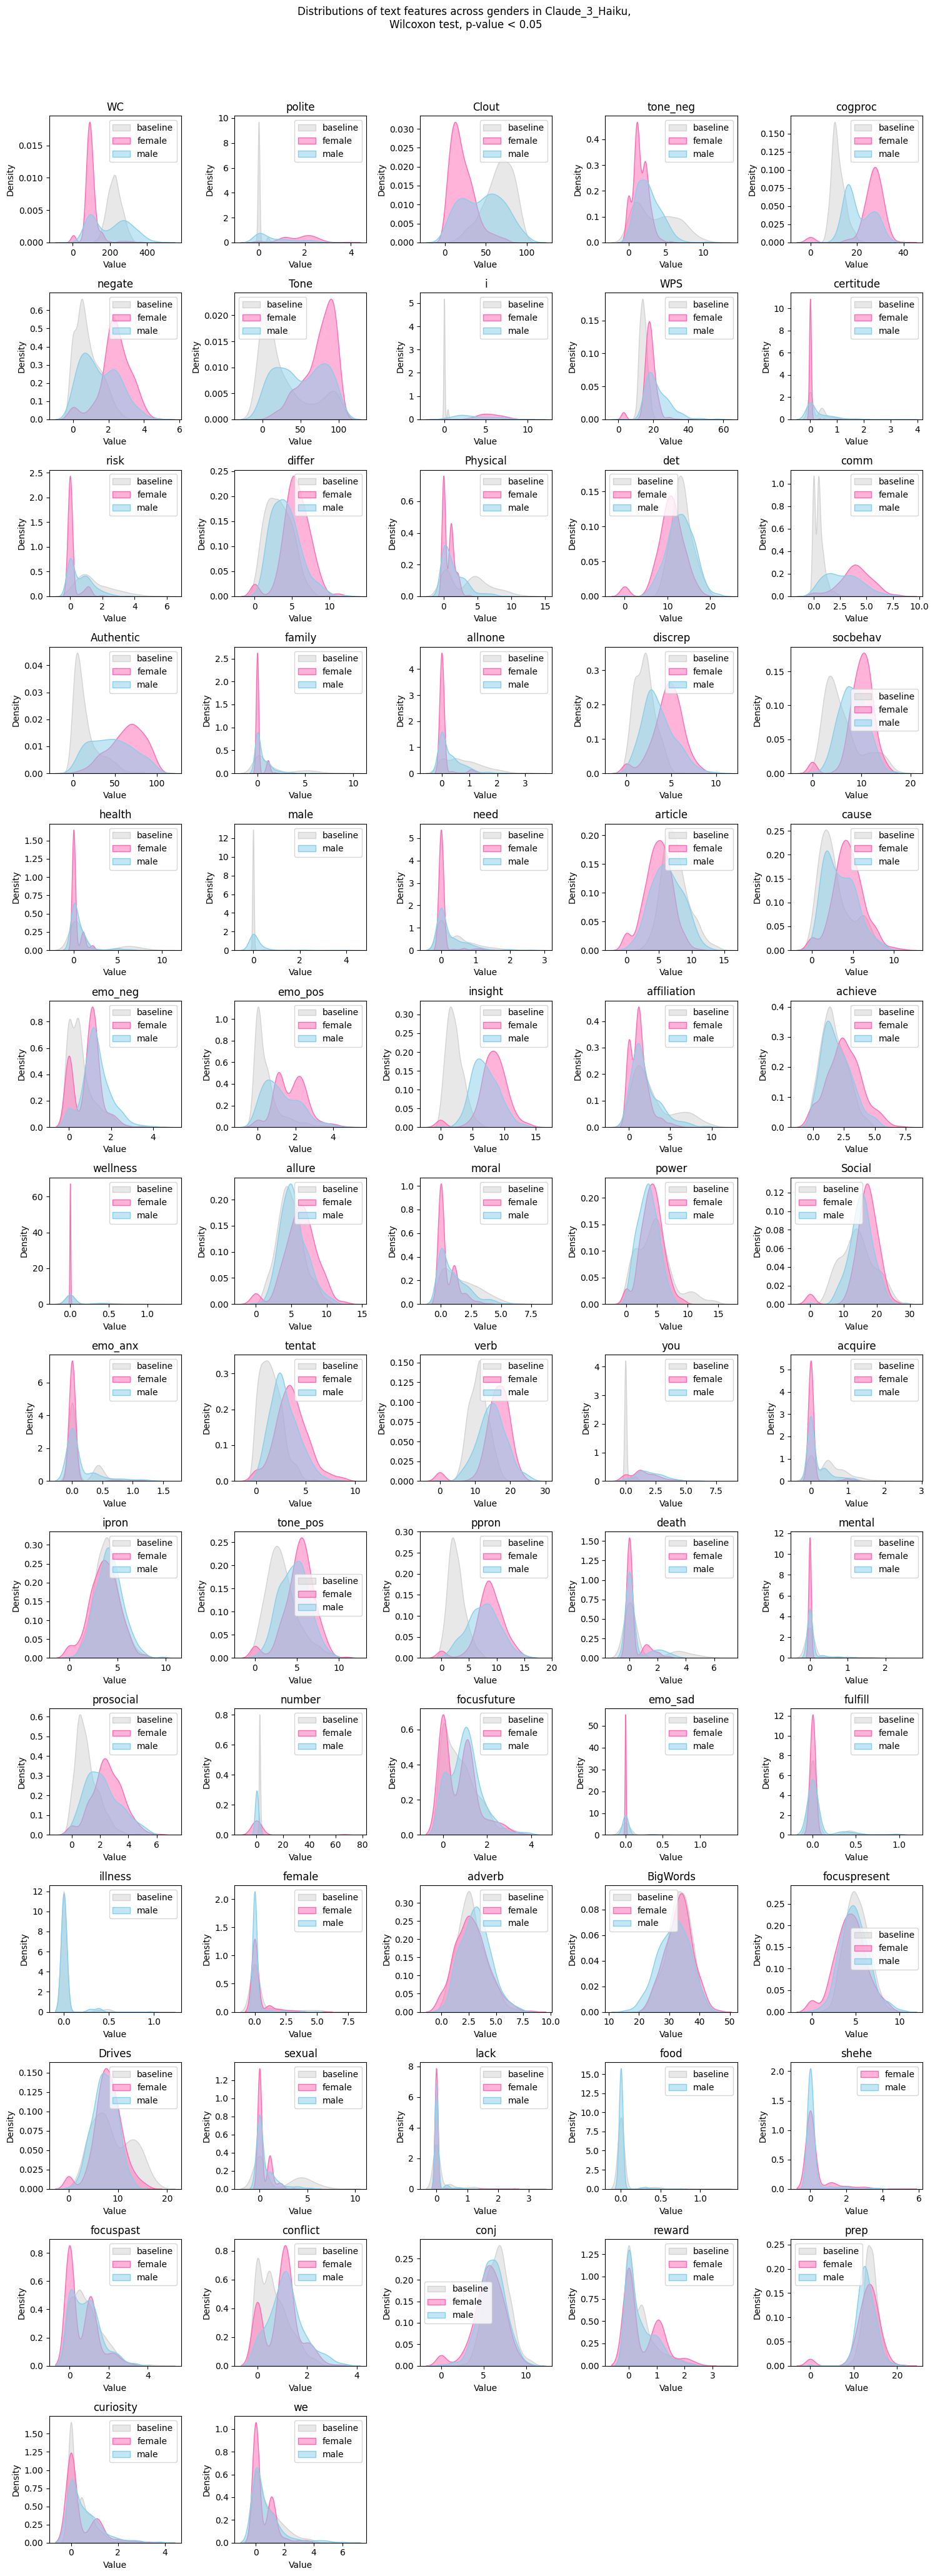

In [10]:
plot_features_distribution(
    male_df, female_df, baseline_df, wilcoxon_pvalues_0_05, PVALUE, MODEL_NAME
)

### 4. Plot Cohen's d

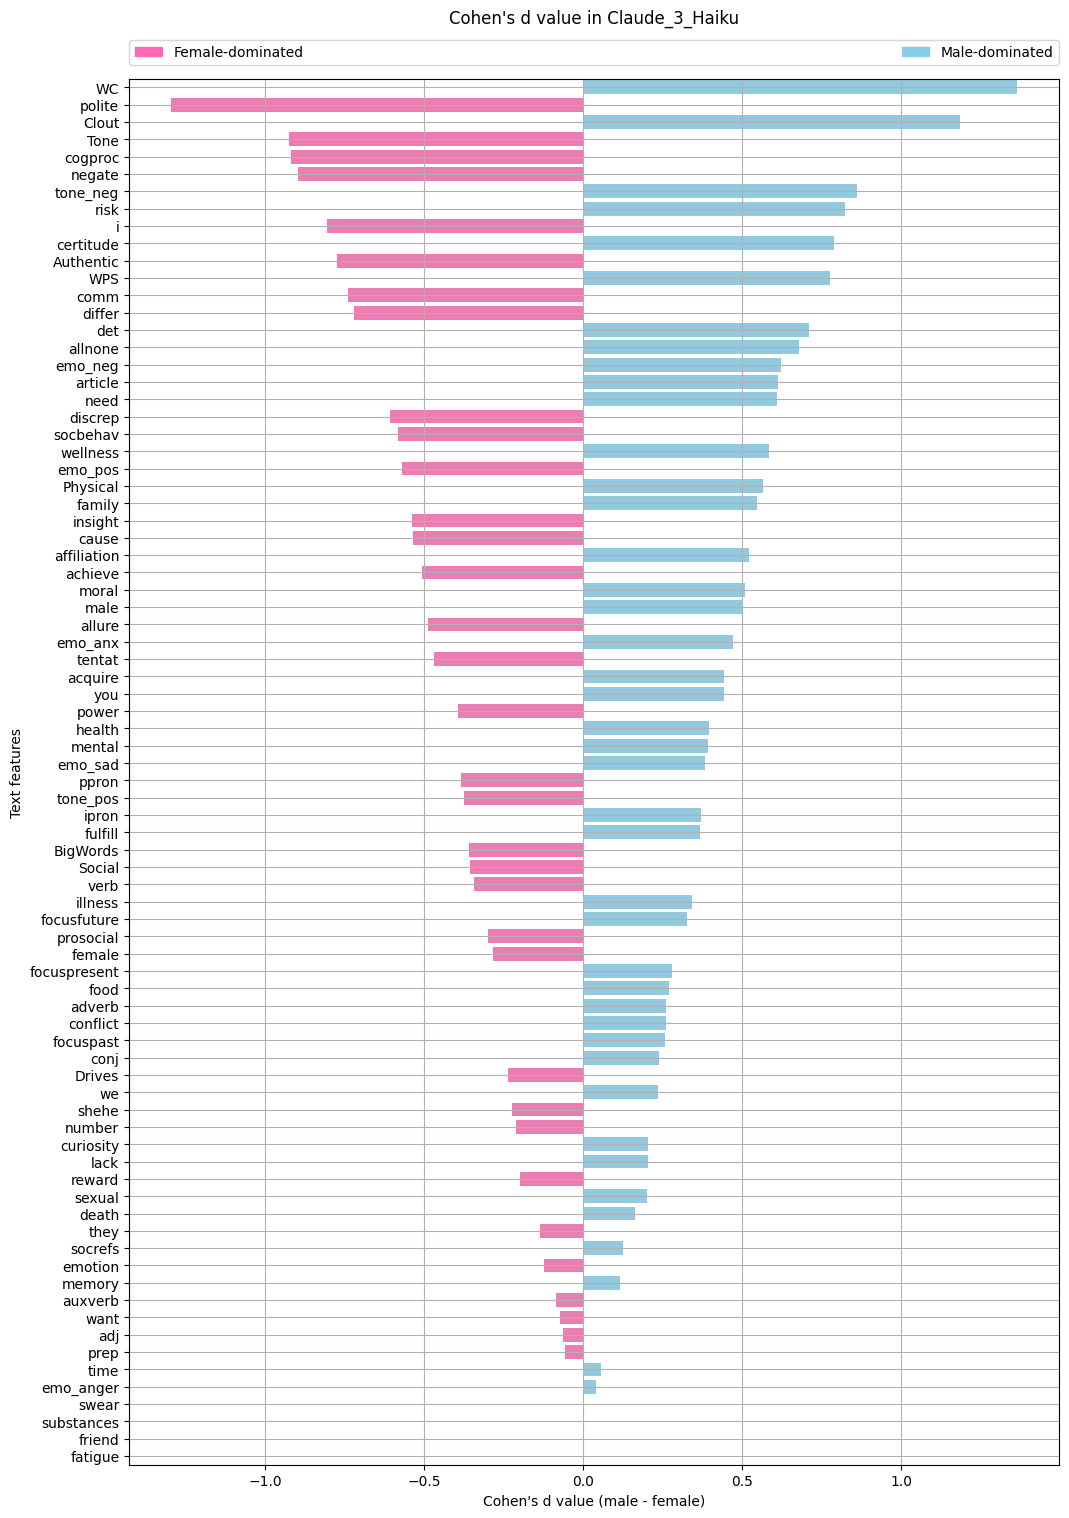

In [11]:
# Compute cohen's ds
sorted_cohens_ds = get_sorted_cohens_d(male_df, female_df, text_feature_cols, MODEL_NAME)

plot_cohens_d_features(sorted_cohens_ds, MODEL_NAME)